# Installing Libs

In [66]:
!pip install catboost xgboost lightgbm -q
!pip install gdown -q

# Imports

In [67]:
# Standard Libraries
import warnings
from collections import Counter

# Third-Party Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Frameworks
import catboost
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

# Scikit-Learn Components
from sklearn.metrics import (
  r2_score,
  mean_absolute_error,
  mean_absolute_percentage_error,
  mean_squared_error
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Configuration
warnings.filterwarnings('ignore')

# Downloading Dataset

In [68]:
!gdown 15ZnSVNZJq87NxBe8QQg75wCpst0uEWoV

Downloading...
From (original): https://drive.google.com/uc?id=15ZnSVNZJq87NxBe8QQg75wCpst0uEWoV
From (redirected): https://drive.google.com/uc?id=15ZnSVNZJq87NxBe8QQg75wCpst0uEWoV&confirm=t&uuid=77c80bd0-2eca-4226-b999-57b51bab0c9c
To: /content/dataset.csv
100% 851M/851M [00:06<00:00, 123MB/s]


# Loading Data

In [69]:
df = pd.read_csv(
    "/content/dataset.csv",
).drop(['Unnamed: 0'], axis = 1)

In [70]:
df.shape

(2017824, 38)

In [71]:
df.tail(10)

,county,is_business,product_type,target,is_consumption,datetime,year,datediff_in_days,hour,hour_sine,...,temperature_max_f,dewpoint_min_f,dewpoint_mean_f,dewpoint_max_f,direct_solar_radiation_min_f,direct_solar_radiation_mean_f,direct_solar_radiation_max_f,surface_solar_radiation_downwards_min_f,surface_solar_radiation_downwards_mean_f,surface_solar_radiation_downwards_max_f
2017814,15,0,1,0.004,0,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017815,15,0,1,42.401,1,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017816,15,0,3,2.287,0,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017817,15,0,3,117.332,1,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017818,15,1,0,0.000,0,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017819,15,1,0,197.233,1,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017820,15,1,1,0.000,0,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017821,15,1,1,28.404,1,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017822,15,1,3,0.000,0,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017823,15,1,3,196.240,1,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0


In [72]:
df.pop('datetime')
df.shape

(2017824, 37)

In [73]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
print("Numeric columns:", numeric_columns)

Numeric columns: ['county', 'is_business', 'product_type', 'target', 'is_consumption', 'year', 'datediff_in_days', 'hour', 'hour_sine', 'hour_cosine', 'dayofweek', 'dayofweek_sine', 'dayofweek_cosine', 'week', 'week_sine', 'week_cosine', 'month', 'month_sine', 'month_cosine', 'target_2days_ago', 'euros_per_mwh', 'lowest_price_per_mwh', 'highest_price_per_mwh', 'eic_count', 'installed_capacity', 'temperature_min_f', 'temperature_mean_f', 'temperature_max_f', 'dewpoint_min_f', 'dewpoint_mean_f', 'dewpoint_max_f', 'direct_solar_radiation_min_f', 'direct_solar_radiation_mean_f', 'direct_solar_radiation_max_f', 'surface_solar_radiation_downwards_min_f', 'surface_solar_radiation_downwards_mean_f', 'surface_solar_radiation_downwards_max_f']


In [74]:
len(numeric_columns)

37

In [75]:
df.describe()

,county,is_business,product_type,target,is_consumption,year,datediff_in_days,hour,hour_sine,hour_cosine,...,temperature_max_f,dewpoint_min_f,dewpoint_mean_f,dewpoint_max_f,direct_solar_radiation_min_f,direct_solar_radiation_mean_f,direct_solar_radiation_max_f,surface_solar_radiation_downwards_min_f,surface_solar_radiation_downwards_mean_f,surface_solar_radiation_downwards_max_f
count,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,2017824.0,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,...,1.986848e+06,1.986848e+06,1.986848e+06,1.986848e+06,1.986848e+06,1.986848e+06,1.986848e+06,1.986848e+06,1.986848e+06,1.986848e+06
mean,7.297039e+00,5.368268e-01,1.898927e+00,2.748556e+02,0.5,2.022057e+03,3.218754e+02,1.150222e+01,-1.850272e-04,-1.850272e-04,...,6.709244e+00,8.207562e-01,2.022299e+00,3.166005e+00,9.737510e+01,1.466178e+02,1.951417e+02,8.973836e+01,1.097112e+02,1.270275e+02
std,4.780994e+00,4.986421e-01,1.081766e+00,9.095024e+02,0.5,6.452196e-01,1.826310e+02,6.921728e+00,7.071069e-01,7.071069e-01,...,8.153727e+00,7.460390e+00,7.225584e+00,7.125200e+00,2.027843e+02,2.428074e+02,2.884802e+02,1.608835e+02,1.832383e+02,2.038441e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.021000e+03,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,...,-2.104445e+01,-2.968357e+01,-2.487019e+01,-2.312015e+01,-7.733333e-01,-3.437500e-01,-2.813889e-01,-3.258333e-01,-1.826389e-01,-1.244444e-01
25%,3.000000e+00,0.000000e+00,1.000000e+00,3.780000e-01,0.0,2.022000e+03,1.660000e+02,6.000000e+00,-7.071068e-01,-7.071068e-01,...,7.057129e-01,-4.170294e+00,-2.925067e+00,-1.710059e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.000000e+00,2.000000e+00,3.113300e+01,0.5,2.022000e+03,3.230000e+02,1.200000e+01,0.000000e+00,-1.836970e-16,...,5.968652e+00,5.940186e-01,1.545368e+00,2.533228e+00,0.000000e+00,3.111111e-02,2.844444e-01,3.911111e-01,7.617284e-01,1.182222e+00
75%,1.100000e+01,1.000000e+00,3.000000e+00,1.802062e+02,1.0,2.022000e+03,4.790000e+02,1.800000e+01,7.071068e-01,7.071068e-01,...,1.216482e+01,5.994409e+00,6.939274e+00,8.002222e+00,5.588264e+01,2.182229e+02,3.825778e+02,1.034450e+02,1.475053e+02,1.855606e+02
max,1.500000e+01,1.000000e+00,3.000000e+00,1.548027e+04,1.0,2.023000e+03,6.370000e+02,2.300000e+01,1.000000e+00,1.000000e+00,...,3.181069e+01,2.084463e+01,2.087002e+01,2.368057e+01,9.100844e+02,9.144176e+02,9.544222e+02,8.237189e+02,8.289692e+02,8.487144e+02


In [76]:
# df = df.sample(100)

# Scaling

In [77]:
scaler = MinMaxScaler()

df.iloc[:] = scaler.fit_transform(df)

In [78]:
df

,county,is_business,product_type,target,is_consumption,year,datediff_in_days,hour,hour_sine,hour_cosine,...,temperature_max_f,dewpoint_min_f,dewpoint_mean_f,dewpoint_max_f,direct_solar_radiation_min_f,direct_solar_radiation_mean_f,direct_solar_radiation_max_f,surface_solar_radiation_downwards_min_f,surface_solar_radiation_downwards_mean_f,surface_solar_radiation_downwards_max_f
0,0.0,0,0.333333,0.000046,0,0.0,0.0,0.0,0.50000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0,0.333333,0.006240,1,0.0,0.0,0.0,0.50000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0,0.666667,0.000000,0,0.0,0.0,0.0,0.50000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0,0.666667,0.001118,1,0.0,0.0,0.0,0.50000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0,1.000000,0.000188,0,0.0,0.0,0.0,0.50000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017819,1.0,1,0.000000,0.012741,1,1.0,1.0,1.0,0.37059,0.982963,...,0.634991,0.700092,0.691269,0.646393,0.000044,0.000009,0.00042,0.000395,0.00022,0.000147
2017820,1.0,1,0.333333,0.000000,0,1.0,1.0,1.0,0.37059,0.982963,...,0.634991,0.700092,0.691269,0.646393,0.000044,0.000009,0.00042,0.000395,0.00022,0.000147
2017821,1.0,1,0.333333,0.001835,1,1.0,1.0,1.0,0.37059,0.982963,...,0.634991,0.700092,0.691269,0.646393,0.000044,0.000009,0.00042,0.000395,0.00022,0.000147
2017822,1.0,1,1.000000,0.000000,0,1.0,1.0,1.0,0.37059,0.982963,...,0.634991,0.700092,0.691269,0.646393,0.000044,0.000009,0.00042,0.000395,0.00022,0.000147


In [79]:
df = df.dropna()

# Train Test Split

In [80]:
target = df.pop('target')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.20, shuffle = False)

# Logistic Regression

## Training

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
}

for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

metrics_dict = {
    'Linear Regression': metrics
}

MSE: 0.0006
RMSE: 0.0243
MAE: 0.0081
R2: 0.8708


In [83]:
import gc
gc.collect()

0

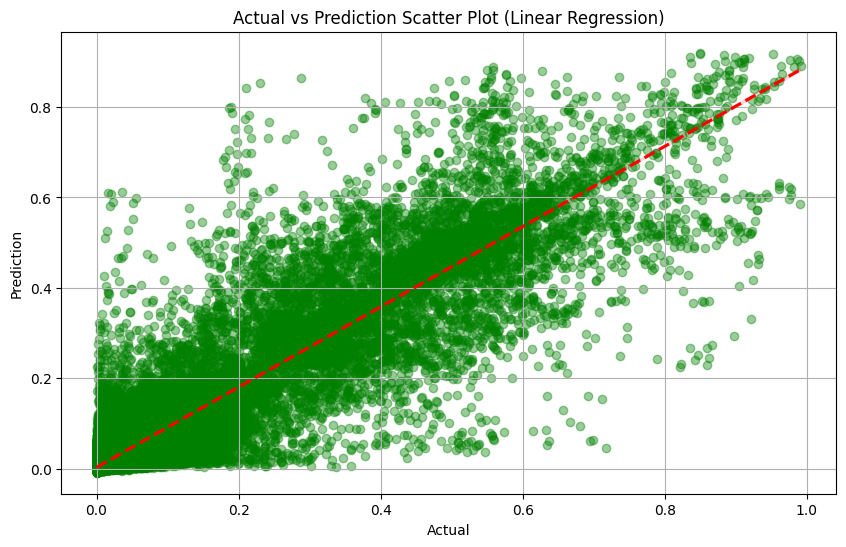

In [84]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4, 'color': 'Green'}, line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Actual vs Prediction Scatter Plot (Linear Regression)')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()

# XGBoost


## Training

In [85]:
model = xgb.XGBRegressor(random_state=42, n_jobs = -1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
}

for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

metrics_dict['XGBoost'] = metrics

MSE: 0.0003
RMSE: 0.0165
MAE: 0.0051
R2: 0.9406


## Feature Explaination

### Feature Importance

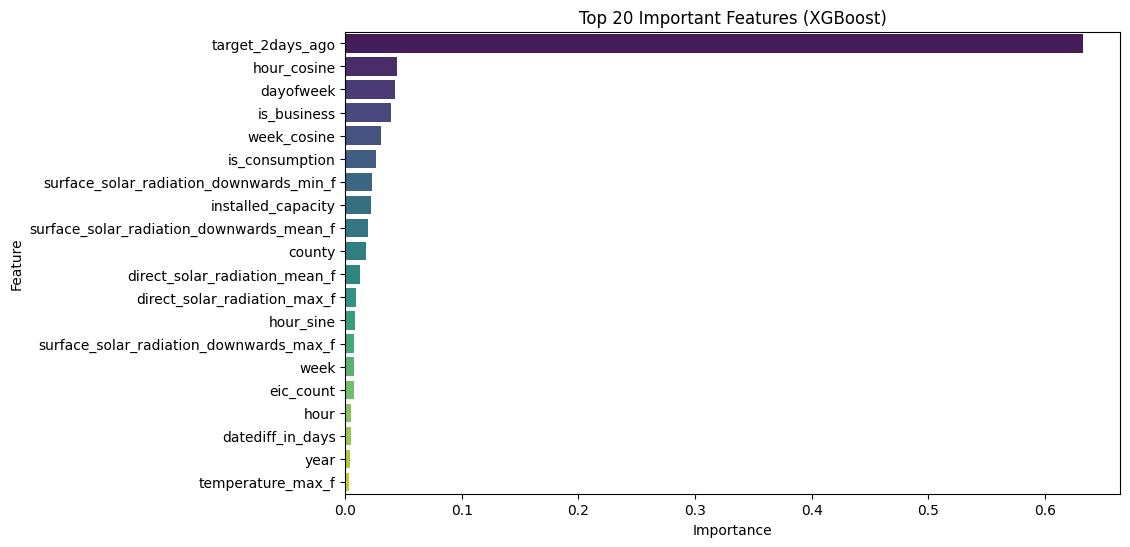

In [86]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})

top_20 = feature_importance.sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_20, palette='viridis')
plt.title('Top 20 Important Features (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

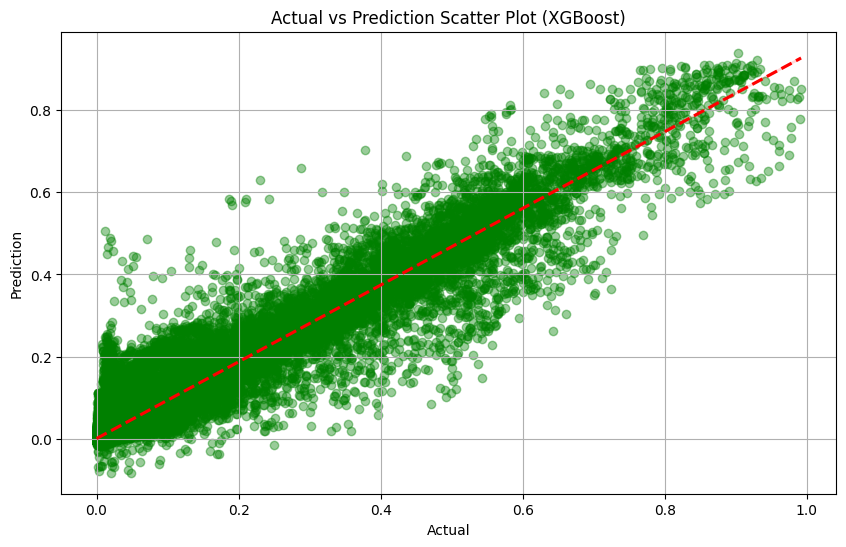

In [87]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4, 'color': 'Green'}, line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Actual vs Prediction Scatter Plot (XGBoost)')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()

# CatBoost


## Training

In [88]:
model = CatBoostRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
}

for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

metrics_dict['CatBoost'] = metrics

Learning rate set to 0.13112
0:	learn: 0.0504501	total: 25.2ms	remaining: 25.2s
1:	learn: 0.0449097	total: 49.7ms	remaining: 24.8s
2:	learn: 0.0401119	total: 73.9ms	remaining: 24.5s
3:	learn: 0.0360567	total: 98.9ms	remaining: 24.6s
4:	learn: 0.0324952	total: 124ms	remaining: 24.7s
5:	learn: 0.0295107	total: 148ms	remaining: 24.6s
6:	learn: 0.0269637	total: 173ms	remaining: 24.6s
7:	learn: 0.0247788	total: 199ms	remaining: 24.7s
8:	learn: 0.0228828	total: 223ms	remaining: 24.6s
9:	learn: 0.0213301	total: 248ms	remaining: 24.5s
10:	learn: 0.0200242	total: 273ms	remaining: 24.6s
11:	learn: 0.0188319	total: 298ms	remaining: 24.6s
12:	learn: 0.0178498	total: 326ms	remaining: 24.7s
13:	learn: 0.0170301	total: 352ms	remaining: 24.8s
14:	learn: 0.0163038	total: 379ms	remaining: 24.9s
15:	learn: 0.0157137	total: 405ms	remaining: 24.9s
16:	learn: 0.0151500	total: 431ms	remaining: 24.9s
17:	learn: 0.0147069	total: 457ms	remaining: 24.9s
18:	learn: 0.0143163	total: 484ms	remaining: 25s
19:	learn:

## Feature Explaination

### Feature Importance

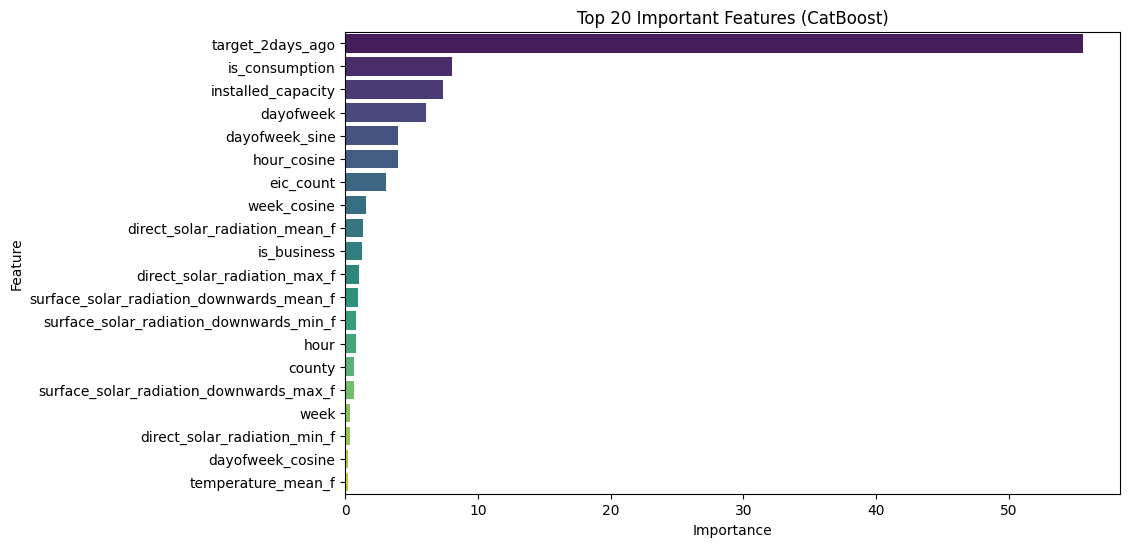

In [89]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})

top_20 = feature_importance.sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_20, palette='viridis')
plt.title('Top 20 Important Features (CatBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

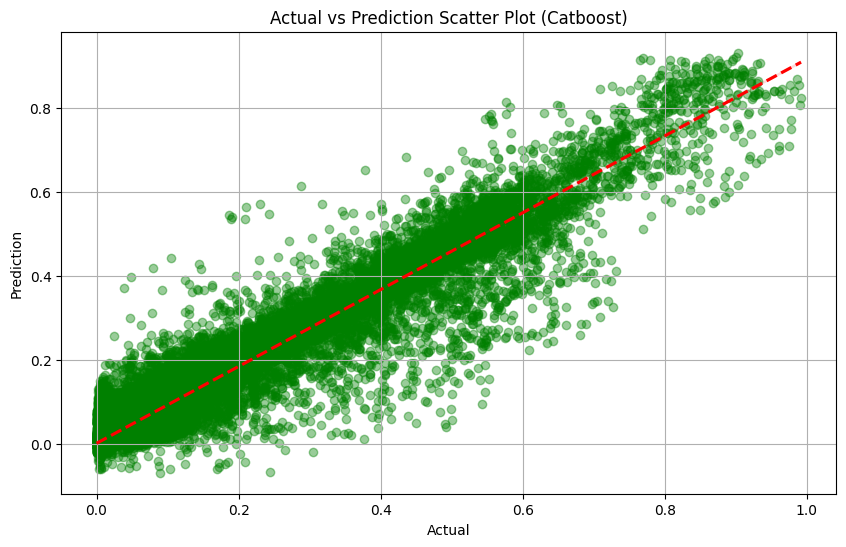

In [90]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4, 'color': 'Green'}, line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Actual vs Prediction Scatter Plot (Catboost)')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()

# LightGBM


## Training

In [91]:
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
}

for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

metrics_dict['LGBM'] = metrics


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5082
[LightGBM] [Info] Number of data points in the train set: 1582305, number of used features: 36
[LightGBM] [Info] Start training from score 0.016729
MSE: 0.0002
RMSE: 0.0152
MAE: 0.0047
R2: 0.9495


## Feature Explaination

### Feature Importance

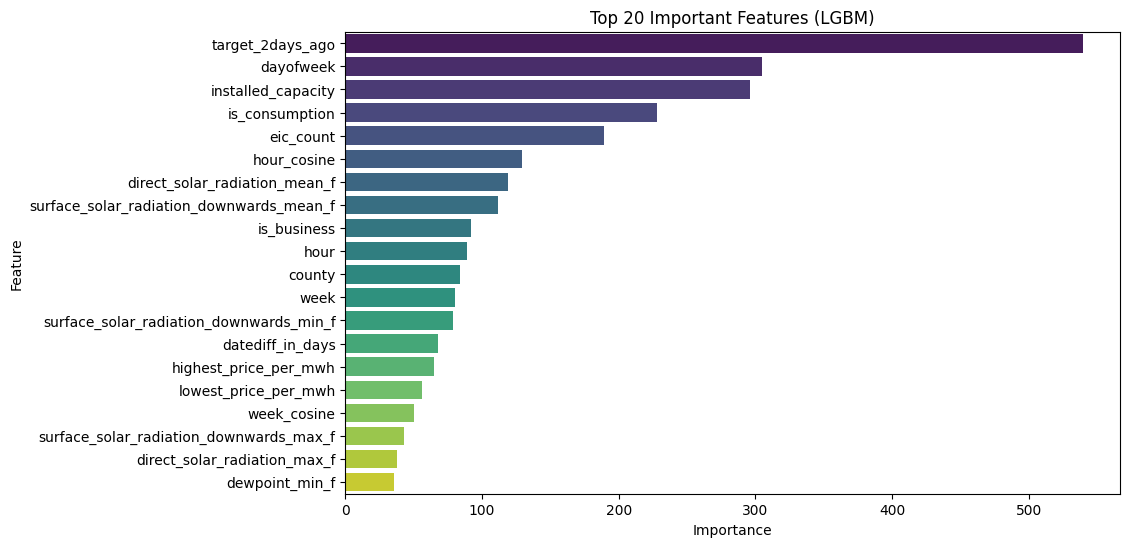

In [92]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})

top_20 = feature_importance.sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_20, palette='viridis')
plt.title('Top 20 Important Features (LGBM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

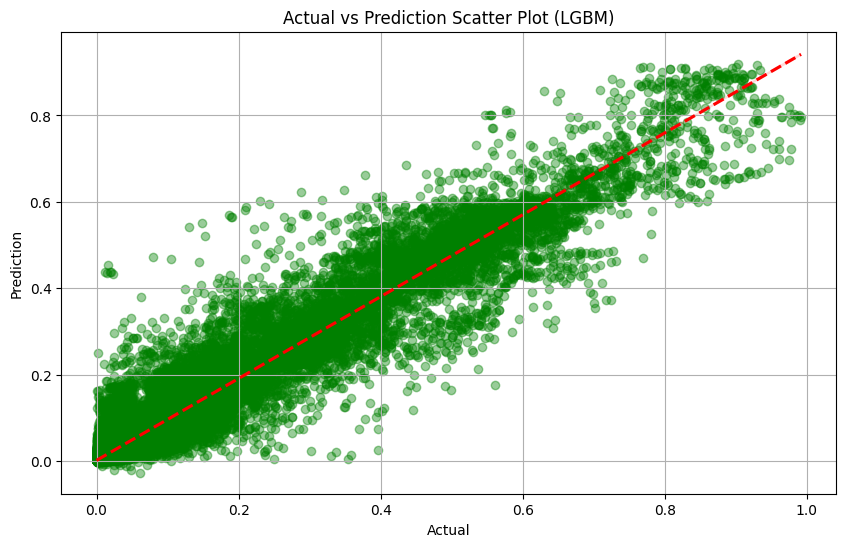

In [93]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4, 'color': 'Green'}, line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Actual vs Prediction Scatter Plot (LGBM)')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()

# Ensamble


In [94]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

## Training

In [95]:
estimators = [
    ('xgboost', xgb.XGBRegressor(random_state=42, n_jobs = -1),),
    ('catboost', CatBoostRegressor(random_state=42, verbose = 0),),
    ('lgbm', LGBMRegressor(random_state=42, verbosity = -1),)
]
model = StackingRegressor(
    estimators=estimators, final_estimator=Ridge()
)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
}

for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

metrics_dict['Ensamble'] = metrics


MSE: 0.0002
RMSE: 0.0143
MAE: 0.0044
R2: 0.9552


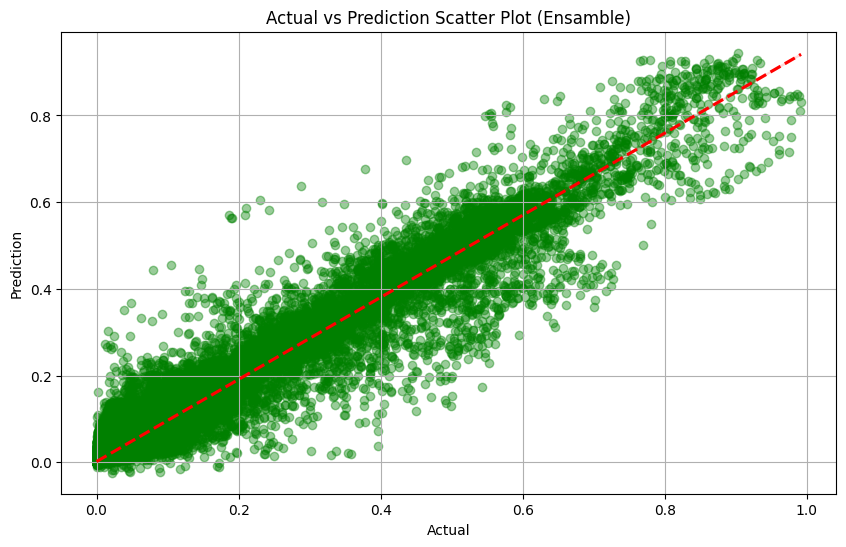

In [96]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4, 'color': 'Green'}, line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Actual vs Prediction Scatter Plot (Ensamble)')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()

# Metrics

In [97]:
data = []
for model, metrics in metrics_dict.items():
    for metric, value in metrics.items():
        data.append({'Model': model, 'Metric': metric, 'Value': value})
metric_df = pd.DataFrame(data)

def plot_metric(metric_name, upper_limit = 1):
    """Helper function to plot individual metrics"""
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        x='Model',
        y='Value',
        data=metric_df[metric_df['Metric'] == metric_name],
        palette=sns.color_palette("Set2"),
        saturation=0.8
    )

    ax.set_title(metric_name + "\n", fontsize=14)
    ax.set_ylim(0, upper_limit)
    ax.set_xlabel('')
    ax.set_ylabel('Score', fontsize=12)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.5f', padding=3, fontsize=10)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

metric_names = ['MSE', 'RMSE', 'MAE', 'R2']

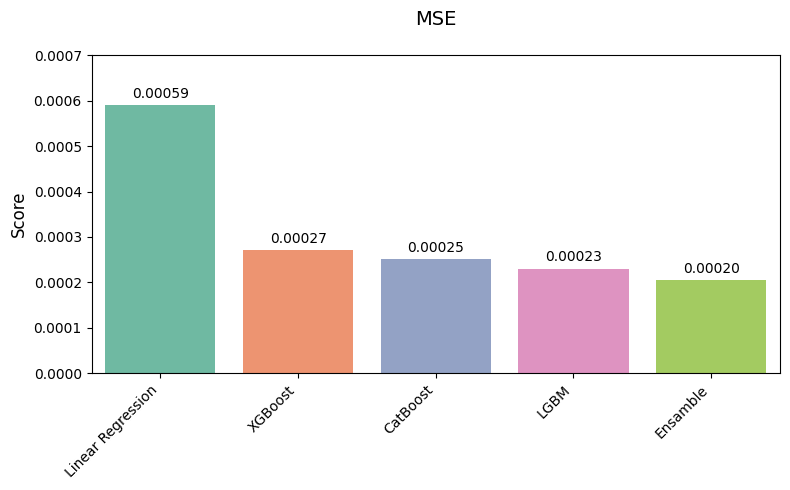

In [98]:
plot_metric(metric_names[0], upper_limit = 0.0007)

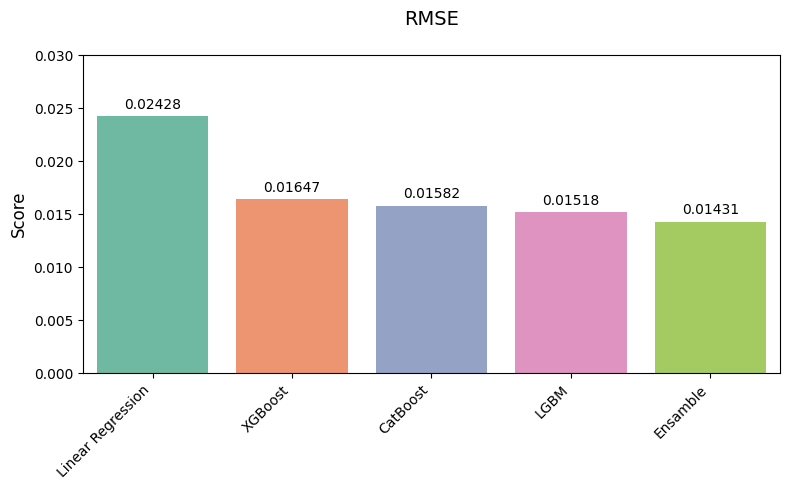

In [99]:
plot_metric(metric_names[1], upper_limit = 0.03)

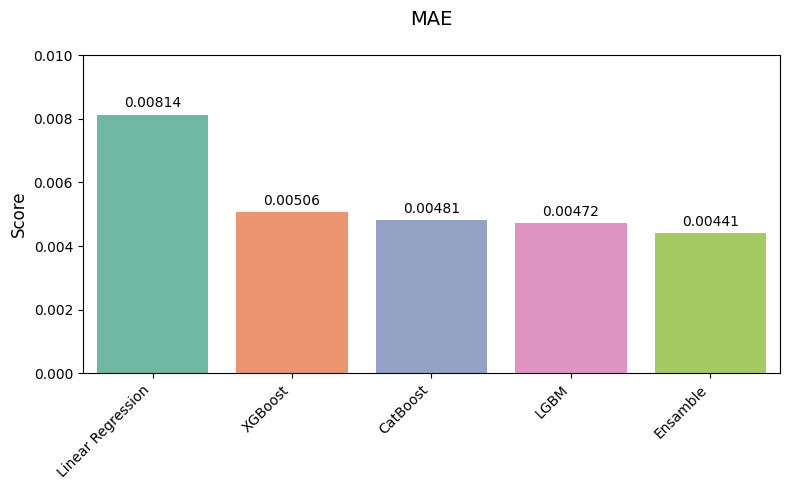

In [100]:
plot_metric(metric_names[2], upper_limit = 0.01)

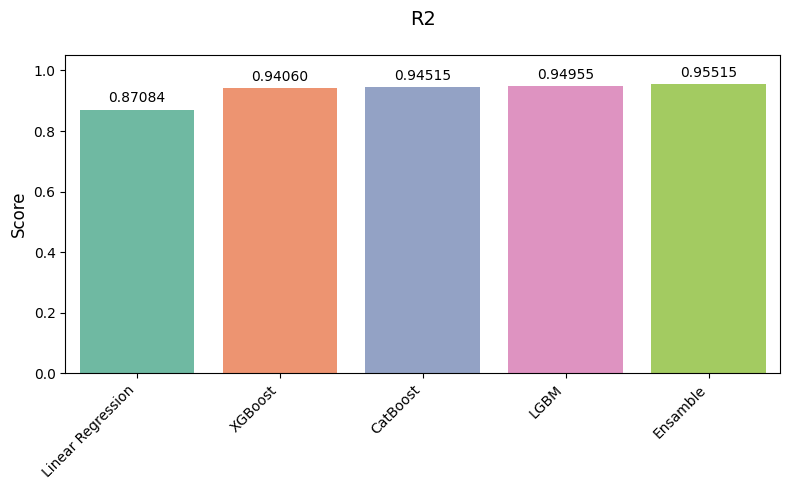

In [104]:
plot_metric(metric_names[3], upper_limit = 1.05)

In [102]:
metric_df.pivot(index="Model", columns="Metric", values="Value").sort_values(by = 'R2', ascending = False).reset_index()

Metric,Model,MAE,MSE,R2,RMSE
0,Ensamble,0.004415,0.000205,0.955152,0.014308
1,LGBM,0.004717,0.000230,0.949546,0.015176
2,CatBoost,0.004814,0.000250,0.945153,0.015823
3,XGBoost,0.005057,0.000271,0.940603,0.016467
4,Linear Regression,0.008138,0.000590,0.870845,0.024282
